In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pandas as pd
import numpy as np

dataset_fname = "QSAR_dataset.xlsx"
test_fname = "test_TP1.xlsx"

# Représentation des données
Dans cette étape, nous devons:
- analyser chaque attribut;
- proposer un prétraitement des données;
- sélectionner les 10 meilleurs attributs avec justification statistique;
- visualiser la distribution des 10 meilleurs attributs.

### Chargement des données

In [2]:
# Chargement des données d'entraînement
df = pd.read_excel(dataset_fname, index_col=0)
# Lecture rapide des cinq premières entrées pour valider le chargement adéquat des données
df.head(5)

,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,
FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[O-],Class 2,41.283001,21.282999,622.40619,43,0,43.0,40,49.644451,14,...,421.45898,27.133842,357.37701,27.133842,3.610454,7.831075,-101.933951,-4.007604,713.09796,246
c12c(cccc1)cccc2,Class 2,22.934343,155.975430,156.69504,18,0,10.0,10,17.839369,10,...,151.37508,0.000000,130.88504,0.000000,0.040120,0.087020,-1.132699,-0.044533,128.17400,50
Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,Class -2,42.919998,38.976181,499.52170,22,0,22.0,22,21.868664,12,...,338.42563,0.000000,345.43402,0.000000,0.048171,0.104483,-1.360008,-0.053470,498.66199,118
ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)OC12,Class -2,38.509171,46.270092,421.43369,23,1,19.0,16,38.822643,10,...,293.98846,2.503756,263.09042,2.503756,4.973507,10.787536,-140.417009,-5.520592,423.76498,130
Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(Cl)c1,Class -2,41.406792,56.392834,480.49115,22,0,21.0,21,26.558620,12,...,330.35486,0.000000,327.14081,0.000000,0.137724,0.298724,-3.888371,-0.152874,464.21698,112


## Analyser chaque attribut

#### Attributs quantitatifs et qualitatifs
D'abord, commençons par distinguer les attributs qualitatifs des attributs numériques. Nous portons une attention particulière aux attributs qualitatifs (ou catégoriques) car ceux-ci nécessitent du pré-traitement particulier.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[O-] to c12c3c4ccc1cccc2ccc3ccc4
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Class          154 non-null    object 
 1   apol           154 non-null    float64
 2   ASA+           152 non-null    float64
 3   ASA-           153 non-null    float64
 4   a_count        154 non-null    int64  
 5   a_donacc       154 non-null    int64  
 6   a_heavy        153 non-null    float64
 7   a_hyd          154 non-null    int64  
 8   a_IC           153 non-null    float64
 9   a_nC           154 non-null    int64  
 10  a_nCl          154 non-null    int64  
 11  a_nF           154 non-null    int64  
 12  a_nH           154 non-null    int64  
 13  balabanJ       154 non-null    float64
 14  bpol           154 non-null    float64
 15  CASA+          154 non-nul

In [4]:
num_cols = df.select_dtypes(exclude=["object", "category"]).columns.tolist()
cat_cols = df.select_dtypes(include=["category", "object"]).columns.tolist()
print("Nombre d'attributs numériques: {}".format(len(num_cols)))
print("Nombre d'attributs catégoriques: {}".format(len(cat_cols)))
if len(cat_cols) > 0:
    print(cat_cols)

Nombre d'attributs numériques: 74
Nombre d'attributs catégoriques: 1
['Class']


Seul l'attribut `Class` est catégorique, ce qui est normal puisqu'il associe une classe à chacune des observations. Tous nos attributs sont donc numériques, ce qui facilitera grandement notre prétraitement.

#### Valeurs aberrantes
Maintenant, détectons les valeurs abberantes ou invalides (`NaN`, `±inf`, etc.). Dans notre traitement, nous commençons par convertir les valeurs `±inf` en `NaN` afin d'éviter des duplicata de code. En effet, ces valeurs nécessiteront le même pré-traitement alors une stratégie optimale consiste à les considérer de la même façon dès le départ.

In [5]:
df = df.replace([-np.inf, np.inf], np.nan)
nan_cols = df.columns[df.isna().any()]
nan_summary = df[nan_cols].isna().sum().sort_values(ascending=False)
nan_ratio = nan_summary / len(df)
nan_df = pd.concat((nan_summary, nan_ratio), axis=1)
nan_df = nan_df.rename(columns={0: "Count", 1: "Ratio"})
print(nan_df)

         Count     Ratio
vsurf_V     18  0.116883
vsurf_S     13  0.084416
vsurf_R      7  0.045455
ASA+         2  0.012987
ASA-         1  0.006494
a_heavy      1  0.006494
a_IC         1  0.006494


On constate que les variables `vsurf_V` et `vsurf_S` contiennent beaucoup de valeurs NaN (11.69% et 8.44% respectivement). Par contraste, `ASA+`, `ASA-`, `a_heavy` et `a_IC` contiennent seulement entre 1 et 2 observations invalides. Plus tard, nous pourrons probablement les supprimer sans affecter grandement la distribution des données.

#### Valeurs uniques
Finalement, nous devons considérons les valeurs uniques. Celles-ci ne sont pas techniquement invalides, mais peuvent néamoins être ignorées car elles ne contribueront pas à la décision des algorithmes. En effet, puisque ces attributs prennent une seule valeur distincte, elles ne seront pas déterminantes dans la tâche de classification.

In [6]:
uniq_cols = df.columns[df.nunique() == 1]
uniq_cols

Index([], dtype='object')

Tous les attributs possèdent donc plusieurs valeurs distinctes.

#### Prétraitement

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])
df_scaled.head(5)

,Class,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
SMILES,,,,,,,,,,,,,,,,,,,,,
FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[O-],Class 2,0.684213,0.035935,0.999003,1.000000,0.00,1.000000,1.000000,0.506522,0.571429,...,0.963492,0.458727,0.710049,0.458727,0.485101,1.0,0.514899,0.514899,0.703882,1.00
c12c(cccc1)cccc2,Class 2,0.164036,0.422997,0.067557,0.193548,0.00,0.000000,0.117647,0.078571,0.285714,...,0.038604,0.000000,0.154971,0.000000,0.003791,1.0,0.996209,0.996209,0.000000,0.02
Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,Class -2,0.730622,0.086779,0.753228,0.322581,0.00,0.363636,0.470588,0.132787,0.428571,...,0.679148,0.000000,0.680780,0.000000,0.004876,1.0,0.995124,0.995124,0.445836,0.36
ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)OC12,Class -2,0.605576,0.107740,0.597048,0.354839,0.25,0.272727,0.294118,0.360910,0.285714,...,0.526976,0.042329,0.478975,0.042329,0.668852,1.0,0.331148,0.331148,0.355706,0.42
Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(Cl)c1,Class -2,0.687723,0.136829,0.715166,0.322581,0.00,0.333333,0.441176,0.195893,0.428571,...,0.651510,0.000000,0.635947,0.000000,0.016949,1.0,0.983051,0.983051,0.404385,0.33


Sélection les 10 attributs avec la plus grande variance

In [31]:
n = 10
top_var = df_scaled[num_cols].var().sort_values(ascending=False)
to_keep = list(top_var[0:n].index)
to_keep.append("Class")
top_var[0:n]

vsurf_A          0.126464
std_dim3         0.126328
vsurf_S          0.123661
rsynth           0.116895
vsurf_V          0.116244
a_nCl            0.087263
PEOE_VSA_POL     0.083095
balabanJ         0.081253
PEOE_VSA_PPOS    0.080797
RPC-             0.072433
dtype: float64

In [36]:
df_n = df.loc[~df.index.duplicated(), :][to_keep]
df_n.head()

,vsurf_A,std_dim3,vsurf_S,rsynth,vsurf_V,a_nCl,PEOE_VSA_POL,balabanJ,PEOE_VSA_PPOS,RPC-,Class
SMILES,,,,,,,,,,,
FC(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(=O)[O-],3.610454,0.944460,-101.933951,0.558140,-4.007604,0,62.977699,7.465846,35.843857,0.081967,Class 2
c12c(cccc1)cccc2,0.040120,0.000282,-1.132699,1.000000,-0.044533,0,0.000000,1.973451,0.000000,0.125000,Class 2
Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(Cl)c1Cl,0.048171,0.622705,-1.360008,0.000000,-0.053470,10,0.000000,2.361498,0.000000,0.100000,Class -2
ClC1(Cl)C2(Cl)C(Cl)=C(Cl)C1(Cl)C1C2C(Cl)C2(Cl)OC12,4.973507,1.228131,-140.417009,0.105263,-5.520592,8,2.503756,1.957714,0.000000,0.124370,Class -2
Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)-c1c(Cl)c(Cl)c(Cl)c(Cl)c1,0.137724,1.216203,-3.888371,0.000000,-0.152874,9,0.000000,2.275799,0.000000,0.101549,Class -2


C:\Users\verdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

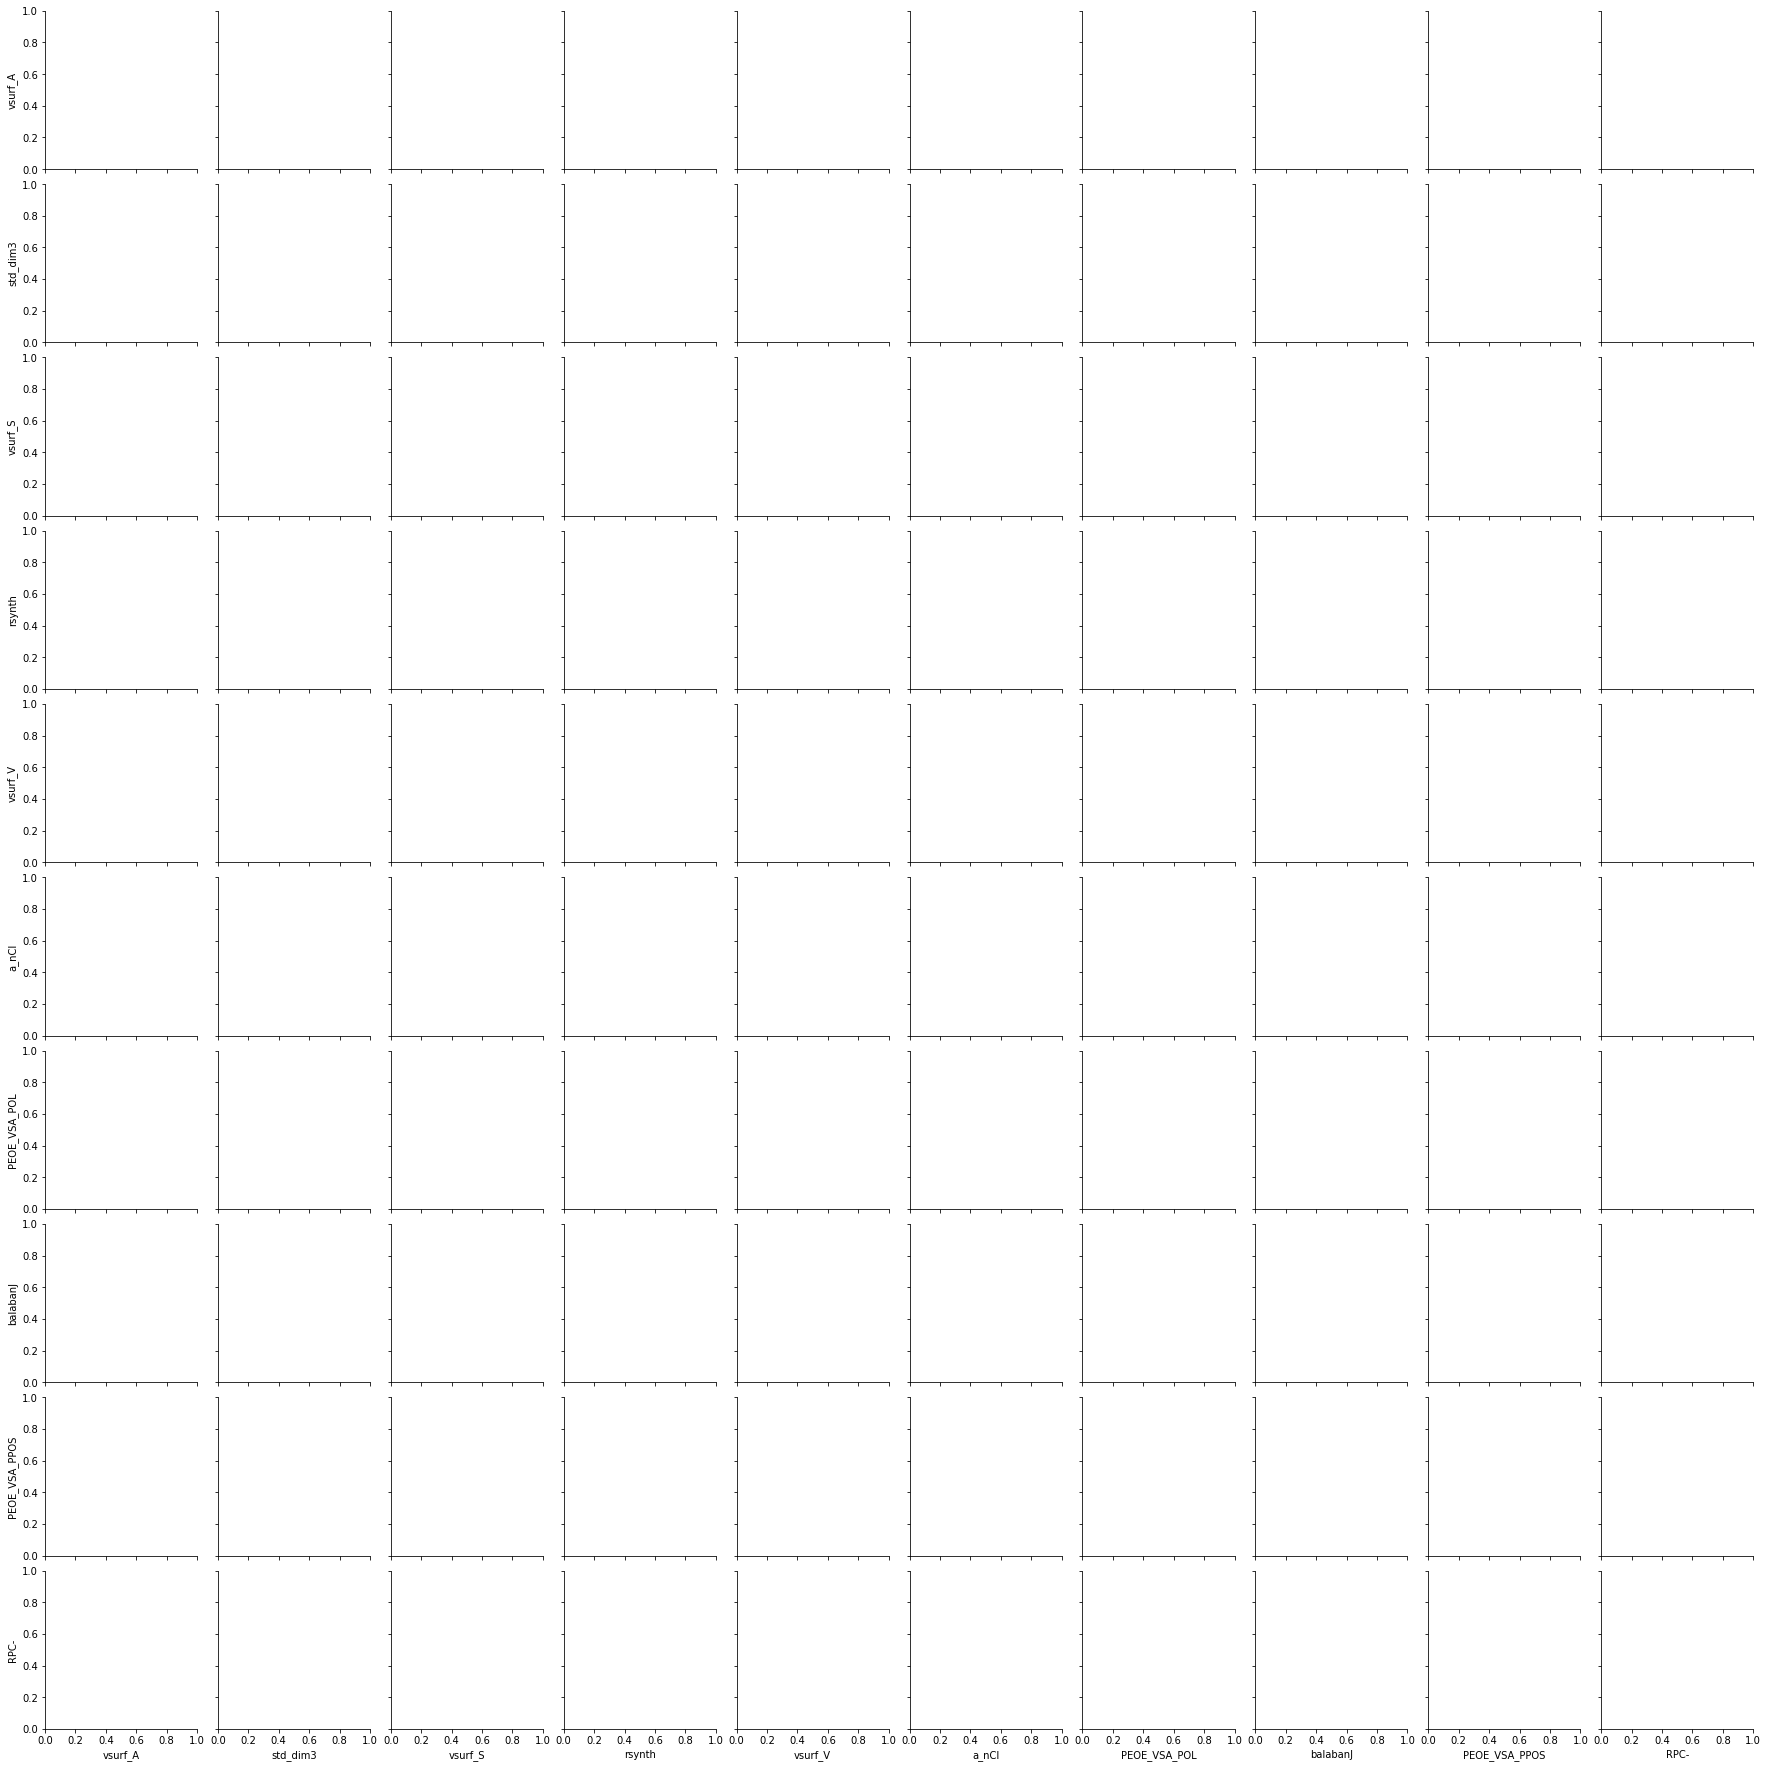

In [35]:
sns.pairplot(df_n, hue='Class')

#### Analyse statistique
On peut maintenant extraire certaines statistiques de base pour tous les attributs

In [9]:
df_describe = df_scaled.describe()
df_describe

,apol,ASA+,ASA-,a_count,a_donacc,a_heavy,a_hyd,a_IC,a_nC,a_nCl,...,VSA,vsa_acc,vsa_hyd,vsa_pol,vsurf_A,vsurf_R,vsurf_S,vsurf_V,Weight,zagreb
count,154.000000,152.000000,153.000000,154.000000,154.000000,153.000000,154.000000,153.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,147.000000,141.000000,136.000000,154.000000,154.000000
mean,0.495056,0.278757,0.474034,0.384164,0.073052,0.268964,0.333843,0.294837,0.403525,0.311039,...,0.456154,0.136542,0.422251,0.153622,0.319174,0.993197,0.684103,0.697825,0.278748,0.276753
std,0.168724,0.179292,0.222458,0.157918,0.215656,0.169589,0.147903,0.130716,0.176582,0.295403,...,0.180755,0.248885,0.146839,0.255784,0.355618,0.082479,0.351655,0.340946,0.159995,0.167437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.407853,0.178546,0.415905,0.322581,0.000000,0.212121,0.294118,0.249489,0.428571,0.000000,...,0.363266,0.000000,0.332448,0.000000,0.015157,1.000000,0.368633,0.387216,0.197134,0.210000
50%,0.522527,0.258288,0.533186,0.322581,0.000000,0.242424,0.323529,0.267341,0.428571,0.400000,...,0.483047,0.000000,0.456618,0.000000,0.049092,1.000000,0.950773,0.951658,0.280035,0.240000
75%,0.602534,0.376025,0.608770,0.443548,0.000000,0.272727,0.352941,0.337569,0.428571,0.600000,...,0.532163,0.229363,0.501451,0.229363,0.643671,1.000000,0.984861,0.985448,0.339525,0.300000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On normalise les différentes variances en fonction de leur moyenne respective. Ceci permet d'évaluer le degré de dispersion des différents attributs sous une même échelle. Des grandes moyennes vont naturellement générées de grandes variances mais cela n'implique pas nécessairement que les données sont très dispersées; l'échelle de mesure est simplement grande. 

In [10]:
np_std = df_describe.loc[["std"]].to_numpy()
np_mean = df_describe.loc[["mean"]].to_numpy()
normalized_std = np_std / np.abs(np_mean)
normalized_describe = df_describe.copy()
normalized_describe.loc[["std"]] = normalized_std
normalized_describe.sort_values(by="std", ascending=False, axis=1)

,a_donacc,a_nF,PEOE_VSA_PPOS,vsa_acc,vsa_pol,PEOE_VSA_POL,PEOE_VSA_PNEG,rsynth,PC+,balabanJ,...,apol,npr2,h_logP,petitjeanSC,PC-,logS,h_logS,logP(o/w),petitjean,vsurf_R
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,147.000000
mean,0.073052,0.095238,0.148559,0.136542,0.153622,0.175753,0.164927,0.234911,0.165450,0.208245,...,0.495056,0.707938,0.498866,0.730190,0.826345,0.518217,0.528896,0.524146,0.795641,0.993197
std,2.952094,2.463909,1.913363,1.822769,1.665030,1.640149,1.585139,1.455441,1.398048,1.368819,...,0.340817,0.317993,0.308974,0.292304,0.287459,0.285097,0.275285,0.269279,0.241443,0.083044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050460,0.073617,...,0.407853,0.598601,0.422317,0.733333,0.853801,0.422989,0.442899,0.463173,0.814815,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.029180,0.042329,0.000000,0.066158,0.095164,...,0.522527,0.726019,0.544032,0.733333,0.936782,0.479708,0.502441,0.548209,0.814815,1.000000
75%,0.000000,0.000000,0.000000,0.229363,0.229363,0.158115,0.229363,0.482069,0.108152,0.118435,...,0.602534,0.884352,0.593348,0.809524,0.944949,0.601596,0.604206,0.591492,0.871795,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


On constate une très grande variance au niveau de `vsurf_R` et une variance presque nulle pour `VAdjMa`. On peut donc déjà indiqué que `VAdjMa` présente une distribution centrée autour de sa moyenne que `vsurf_R` sera très dispersée. On peut s'en convaincre par une visualisation. Cette dernière variable est donc plus "bruitée" mais en même temps contient plus d'information que la première. Ce constat pourrait être utile lors de la sélection des attributs plus tard.

<AxesSubplot:xlabel='VAdjMa', ylabel='VAdjMa'>

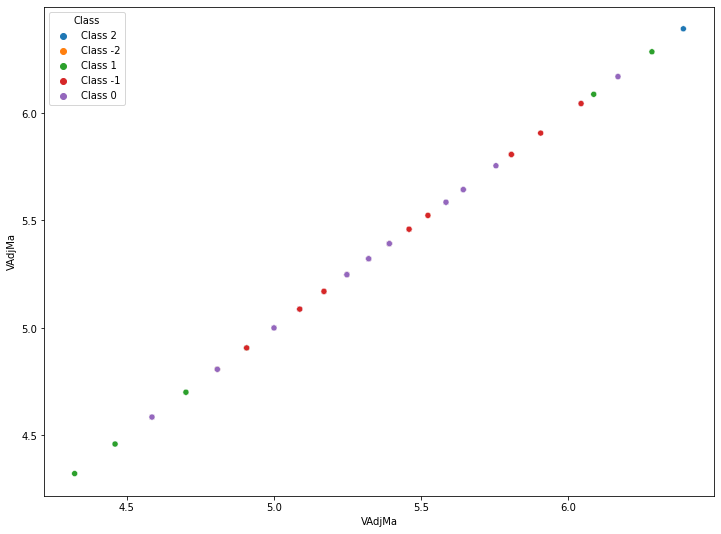

In [11]:
f, ax = plt.subplots(figsize=(12, 9))
sns.scatterplot(x=df["VAdjMa"], y=df["VAdjMa"], hue=df["Class"])


#### Analyse de la covariance
On peut maintenant évaluer la matrice de variance-covariance entre les attributs. 

<AxesSubplot:>

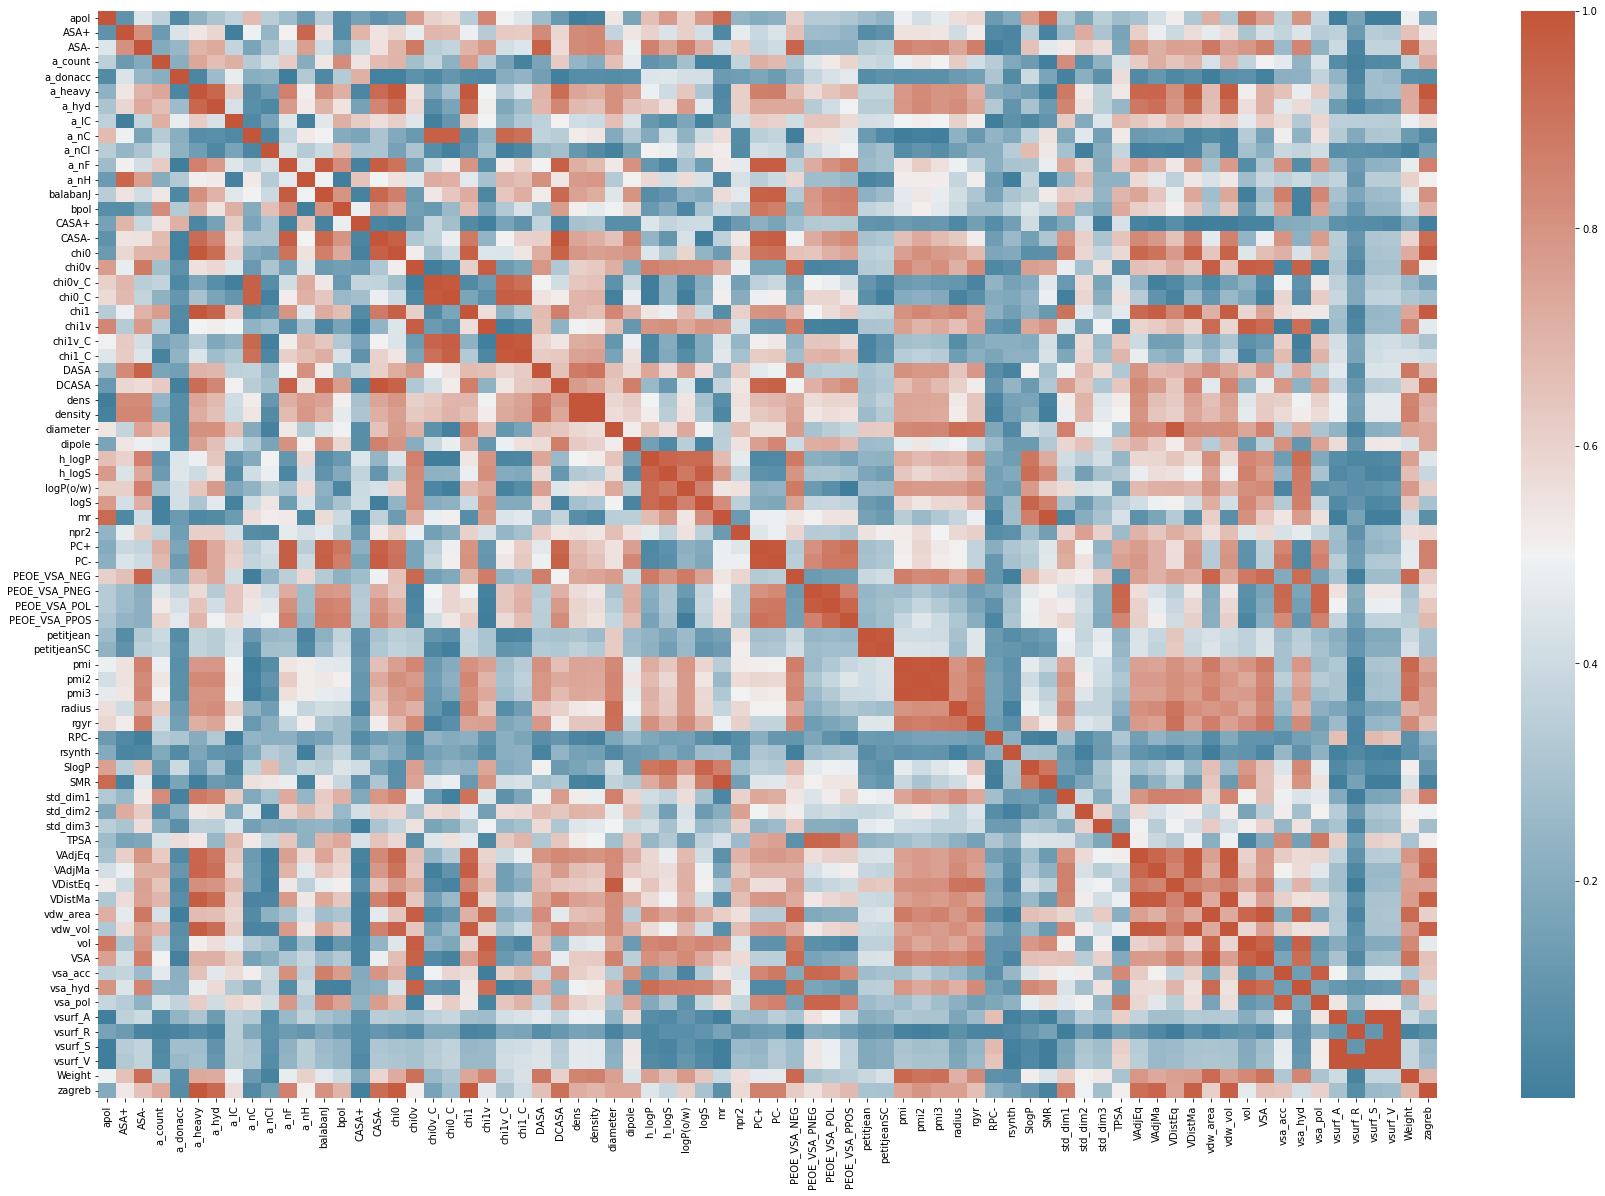

In [12]:
# Code inspiré de https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Pour éviter de la confusion, on calcule la matrice de covariance absolue.
# Ainsi, les cases bleues indiquent une absence de corrélation et les cases rouges l'inverse.
corr_mat = df[num_cols].corr().abs()
# On masque le haut de la matrice diagonale
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
f, ax = plt.subplots(figsize=(30, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_mat, annot=False, cmap=cmap)

In [13]:
# Code inspiré de https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/
# Nous avons testé plusieurs ratio différents et celui-ci permettait de filtrer plusieurs attributs.
max_rho = 0.75
# Sélectionner triangle supérieur de la matrice de corrélation
upper = corr_mat.where(np.triu(np.ones_like(corr_mat), k=1).astype(bool))
# Sélectionner les attributs dont la corrélation dépasse le seuil `max_rho`
to_drop = [column for column in upper.columns if any(upper[column] >= max_rho)]
print("Total d'attributs dépassant le seuil {:.2f}: {}".format(max_rho, len(to_drop)))
print(to_drop)

Total d'attributs dépassant le seuil 0.75: 58
['ASA-', 'a_hyd', 'a_nF', 'a_nH', 'balabanJ', 'bpol', 'CASA-', 'chi0', 'chi0v', 'chi0v_C', 'chi0_C', 'chi1', 'chi1v', 'chi1v_C', 'chi1_C', 'DASA', 'DCASA', 'dens', 'density', 'diameter', 'dipole', 'h_logP', 'h_logS', 'logP(o/w)', 'logS', 'mr', 'PC+', 'PC-', 'PEOE_VSA_NEG', 'PEOE_VSA_PNEG', 'PEOE_VSA_POL', 'PEOE_VSA_PPOS', 'petitjeanSC', 'pmi', 'pmi2', 'pmi3', 'radius', 'rgyr', 'SlogP', 'SMR', 'std_dim1', 'std_dim2', 'TPSA', 'VAdjEq', 'VAdjMa', 'VDistEq', 'VDistMa', 'vdw_area', 'vdw_vol', 'vol', 'VSA', 'vsa_acc', 'vsa_hyd', 'vsa_pol', 'vsurf_S', 'vsurf_V', 'Weight', 'zagreb']


In [14]:
df_prime = df.drop(columns=to_drop, inplace=False)
print("Nombre d'attributs supprimés: {}".format(len(to_drop)))
print("Ratio : {:8.4f}".format(len(to_drop) / len(df)))
print("Nombre d'attributs restants: {}".format(len(df_prime.columns)))

Nombre d'attributs supprimés: 58
Ratio :   0.3766
Nombre d'attributs restants: 17


<AxesSubplot:>

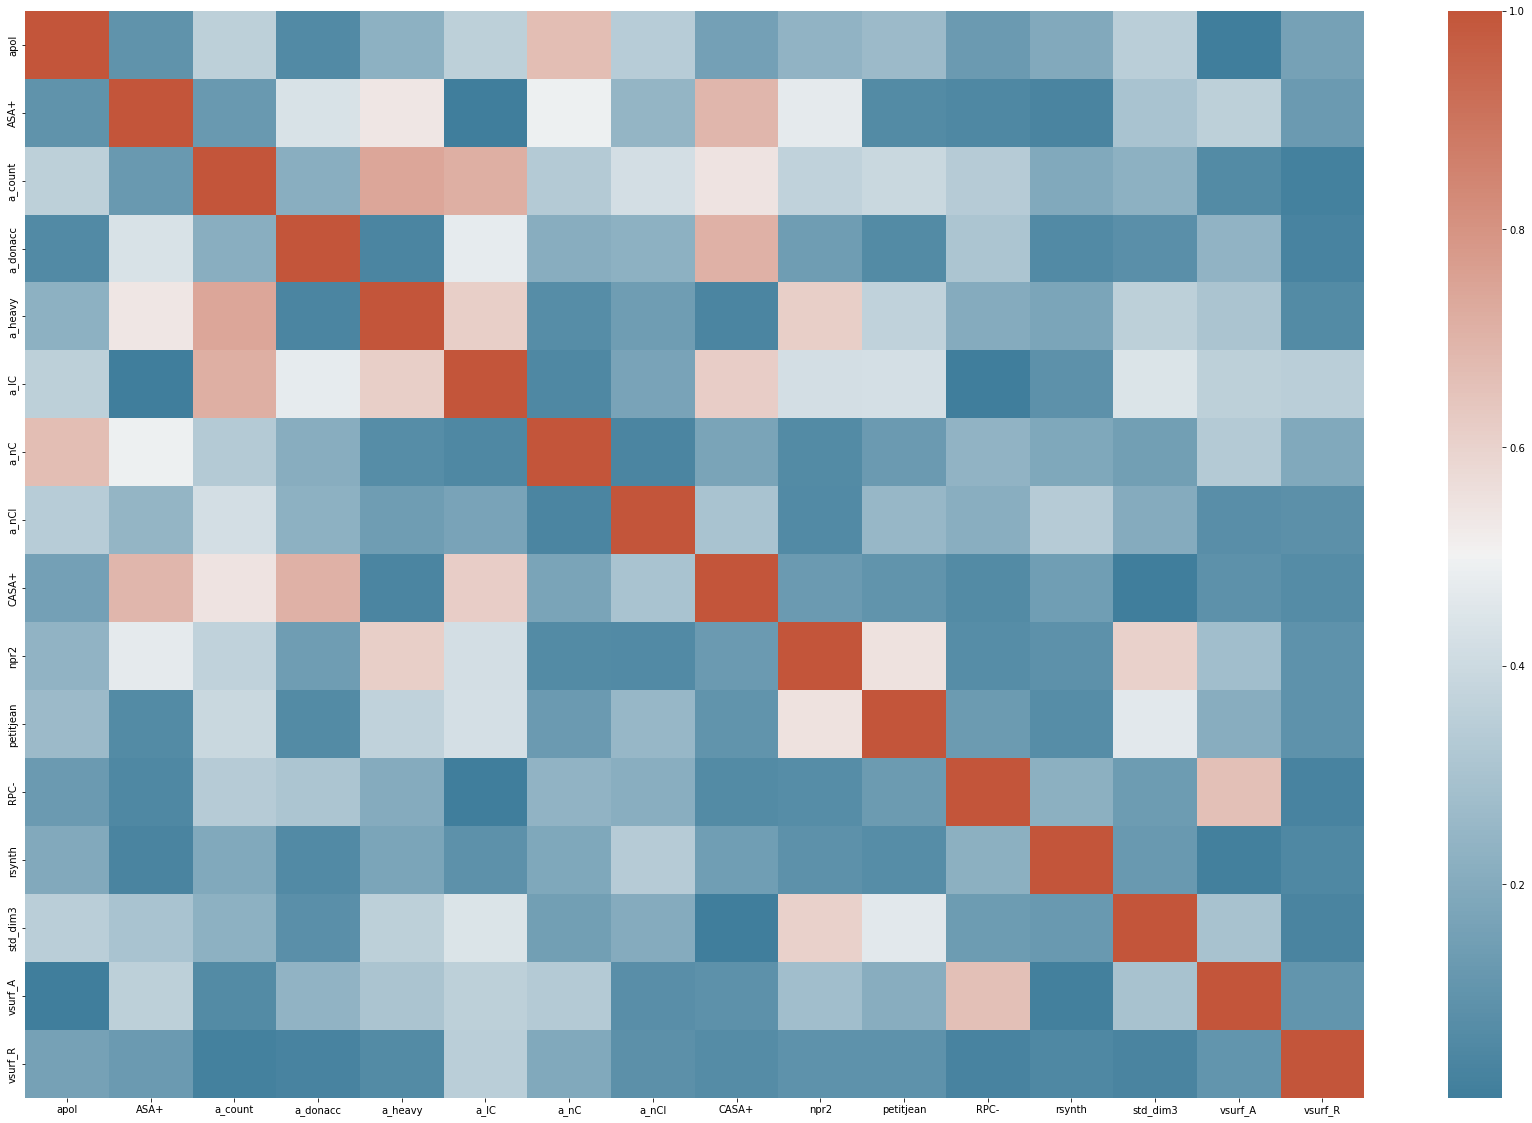

In [15]:
num_cols_prime = df_prime.select_dtypes(exclude=["object", "category"]).columns.tolist()
corr_mat_prime = df_prime[num_cols_prime].corr().abs()
# On masque le haut de la matrice diagonale
f, ax = plt.subplots(figsize=(30, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_mat_prime, annot=False, cmap=cmap)